### sentimatnet analysis

In [10]:
import pandas as pd
import spacy

# Spacy seems to be a more thorough tool compared to nltk
# commenting out nltk while testing Spacy
#import nltk
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer

# idea for clustering
#import networkx as nx

In [11]:
# getting books
books = pd.read_csv('final_books.csv')

# Identify duplicates by book title
duplicates = books['title'].duplicated(keep='first')

# Drop duplicate books based on their index
books.drop(index=books[duplicates].index, inplace=True)

#Dropping null values
books = books = books.dropna(subset=['description']).reset_index(drop=True)
#books

### Cleaning texts

In [12]:
# prepares text to have a fair comparisons
def preprocess_text(text):
    # Create a spaCy nlp object
    nlp = spacy.load('en_core_web_md')
    
    # Tokenize the text
    doc = nlp(text)
    
    # Remove stop words
    tokens = [token for token in doc if not token.is_stop]
    
    # Lemmatize the tokens
    tokens = [token.lemma_ for token in tokens]
    
    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [13]:
# Filter out non-string descriptions
descriptions = books['description'].astype(str)

In [14]:
# Preprocess the descriptions using the preprocess_text function
preprocessed_descriptions = descriptions.apply(preprocess_text)
print(preprocessed_descriptions.head(10))


0    draw masse new rediscover material , author de...
1    logo -- food fashion conference corporation --...
2    Newbery Medal winner \r\n\r\n " supersharp mys...
3    million fan know watch Food Network , Tyler li...
4    travel globe host Food Network hit tv show " T...
5    charge want difference : dilemma . know charge...
6    " Es una composicion en busca de la frase just...
7    - popular Kitchen Confidential available Spani...
8    Ovid sensuous witty poem , accessible translat...
9    play Bacchae , Euripides choose central figure...
Name: description, dtype: object


In [15]:
from textblob import TextBlob

# gets the sentiment polarity of a given text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Applying the get_sentiment function to the preprocessed descriptions
sentiments = preprocessed_descriptions.apply(get_sentiment)


In [16]:
sentiments

0       0.256566
1       0.133766
2       0.150144
3       0.347222
4       0.088904
          ...   
3020   -0.180808
3021    0.000000
3022    0.000000
3023    0.000000
3024    0.155311
Name: description, Length: 3025, dtype: float64

In [17]:
books['sentiment'] = sentiments
books.head(11)

,id,title,isbn,page_count,publishing_date,form,publisher,language,author,illustrator,...,subject,awards,nominations,characters,description,sub_title,book_id,average_rating,ratings_count,sentiment
0,ilINAQAAMAAJ,Kahlil Gibran,"9781566562492, 156656249X",456,1998,Paperback,Interlink Books,English,"Jean Gibran, Kahlil Gibran",NaN,...,"Authors, Arab -- Biography -- Lebanon -- Unite...",NaN,NaN,NaN,Drawing on masses of new and rediscovered mate...,His Life and World,ilINAQAAMAAJ,NaN,NaN,0.256566
1,cOpWAQAACAAJ,LogoLounge,NaN,191,September 2004,Paperback,Rockport Publishers,English,"Bill Gardner, Catharine Fishel",NaN,...,"Design / General, Design / Graphic Arts / Comm...",NaN,NaN,NaN,Logos -- for everything from food and fashion ...,"2,000 International Identities by Leading Desi...",cOpWAQAACAAJ,NaN,NaN,0.133766
2,JJWMEAAAQBAJ,The Westing Game,"9780142401200, 014240120X",192,2004,Paperback,Penguin Young Readers Group,English,Ellen Raskin,NaN,...,Juvenile Fiction / Family / Marriage & Divorce...,John Newbery Medal,"John Newbery Medal, National Book Award for Ch...","Samuel W. Westing, Berthe Erica Crow, Catherin...","A Newbery Medal Winner\r\n\r\n""A supersharp my...",NaN,JJWMEAAAQBAJ,4.0,1.0,0.150144
3,cGxOHgpsgX8C,Tyler's Ultimate,"9781400052387, 1400052386",254,2006,Hardcover,Clarkson Potter/Publishers,English,Tyler Florence,NaN,...,"Cooking, Cooking / Courses & Dishes / General,...",NaN,NaN,NaN,As his millions of fans know from watching him...,Brilliant Simple Food to Make Any Time,cGxOHgpsgX8C,NaN,NaN,0.347222
4,nF2PcyCJb0UC,Eat this Book,"9781400052370, 1400052378",287,2005,Hardcover,Clarkson Potter/Publishers,English,Tyler Florence,NaN,...,"Cookery, Cooking, Cooking / Methods / General,...",NaN,NaN,NaN,While traveling the globe as the host of Food ...,Cooking with Global Fresh Flavors,nF2PcyCJb0UC,NaN,NaN,0.088904
5,4rCumAEACAAJ,Getting Things Done When You Are Not in Charge,"9781576751725, 1576751724",156,"August 27, 2001",Paperback,Berrett-Koehler Publishers,English,Geoffrey M. Bellman,NaN,...,"Business & Economics / Leadership, Business & ...",NaN,NaN,NaN,You are not in charge and you want to make a d...,NaN,4rCumAEACAAJ,NaN,NaN,0.088485
6,5VZzSgAACAAJ,Formas breves,NaN,142,2000,Hardcover,Anagrama,Spanish,Ricardo Piglia,NaN,...,"Argentine literature -- History and criticism,...",NaN,NaN,NaN,"""Es una composicion en busca de la frase justa...",NaN,5VZzSgAACAAJ,NaN,NaN,0.000000
7,XE0MAAAACAAJ,Confesiones de un chef,"9788466308953, 8466308954",478,2002,Paperback,Suma de Letras,Spanish,Anthony Bourdain,NaN,...,Cooks -- Biography -- New York (State) -- New ...,NaN,NaN,NaN,The ever-popular Kitchen Confidential is now a...,NaN,XE0MAAAACAAJ,NaN,NaN,0.433333
8,iYOMEAAAQBAJ,Metamorphoses,"9780140447897, 014044789X",723,"January 29, 2004",Paperback,Penguin Publishing Group,English,Ovid,NaN,...,"Fiction / Classics, Literary Criticism / Poetr...",NaN,NaN,NaN,"Ovid’s sensuous and witty poem, in an accessib...",NaN,iYOMEAAAQBAJ,NaN,NaN,0.332851
9,B_YEEAAAQBAJ,Dionysiac Poetics and Euripides' Bacchae,"9780691015972, 069101597X",420,"November 16, 1997",Paperback,Princeton University Press,English,Charles Segal,NaN,...,"Literary Criticism / Ancient & Classical, Bacc...",NaN,NaN,NaN,"In his play Bacchae, Euripides chooses as his ...",Expanded Edition,B_YEEAAAQBAJ,NaN,NaN,0.145370


In [18]:
# Get the 10 books with the most negative sentiments
top_negative = books.loc[sentiments.nsmallest(10).index][['title', 'author', 'description', 'genres', 'sentiment']]
print("Top 10 books with the most negative sentiments:")
top_negative

Top 10 books with the most negative sentiments:


,title,author,description,genres,sentiment
192,Harry Potter y La Orden del Fenix,J. K. Rowling,Las tediosas vacaciones de verano en la casa d...,"Novel, Young adult fiction, Fantasy Fiction",-1.000000
1487,Carrie (Los Jet De Plaza & Janes. Biblioteca D...,Stephen King,El escalofriante caso de una joven en aparienc...,"Horror fiction, Horror, Epistolary novel",-1.000000
1608,Last Man Standing,David Baldacci,An FBI agent in the Hostage and Rescue Team be...,"Thriller, Fiction, Suspense, Crime fiction, My...",-0.875000
3014,Materia oscura,Philip Pullman,"Aunque la trilogía Materia oscura, originalmen...",NaN,-0.875000
650,El perfume,Patrick Süskind,Jean Baotiste Grenouille nació con muy poca su...,"Novel, Mystery, Horror fiction, Magical Realis...",-0.850000
1810,The basic problems of phenomenology,Martin Heidegger,Based on a course of lectures given by Martin ...,NaN,-0.800000
2483,Who's to Blame?,"Kate William, Francine Pascal","""Elizabeth and Jessica Wakefield's parents hav...",NaN,-0.800000
306,Trainspotting,Irvine Welsh,"Sick Boy, Spud, Mark et Matty partagent tout :...","Novel, Fiction, Dark comedy, Travel literature",-0.714286
1938,The Omega Cage,"Steve Perry, Michael Reaves",Omega Cage is a hi-tech prison on an isolated ...,"Science fiction, Space opera",-0.627083
2724,The New Jessica,Francine Pascal,Jessica Wakefield is sick and tired of being a...,NaN,-0.607143


In [19]:
# Get the 10 books with the most positive sentiments
top_positive = books.loc[sentiments.nlargest(10).index][['title', 'author', 'description', 'genres', 'sentiment']]
print("\nTop 10 books with the most positive sentiments:")
top_positive


Top 10 books with the most positive sentiments:


,title,author,description,genres,sentiment
2214,The Starry Rift,"James Tiptree, Jr.","Before her death, Alice Sheldon--writing under...",NaN,0.800000
592,The Heidi Chronicles,Wendy Wasserstein,THE STORY: Comprised of a series of interrelat...,NaN,0.750000
2879,A Whole Lotta Love,"Donna Hill, Brenda Jackson, Francis Ray, Monic...",Four curvaceous bombshells find love and roman...,"Fiction, Romance novel",0.750000
2475,Sylvester,Georgette Heyer,"""Sylvester"" is one of the best of Georgette He...","Romance novel, Regency romance, Historical Fic...",0.737500
2955,Silver Pigs,Lindsey Davis,Winner of the Best First Novel award from the ...,"Novel, Mystery, Historical Fiction, Crime fict...",0.700000
1876,My Perfect Life Reissue,Dyan Sheldon,Captures teen angst with wit and poignancy. . ...,"Young adult fiction, Humor, Comedy, Chick lit",0.665079
621,Ruby Ann's Down Home Trailer Park BBQin' Cookbook,Ruby Ann Boxcar,b/w photos throughout. The voluptuous gourmet ...,"Humor, Cookbook",0.650000
640,Henry Miller on Writing,Henry Miller,Some of the most rewarding pages in Henry Mill...,NaN,0.650000
1836,One More for the Road,Ray Bradbury,Ray Bradbury provides readers with tales of ab...,"Short story, Science fiction, Fantasy, Fantasy...",0.650000
2128,Dazzling Brightness,Roberta Gellis,"An enchanting, unforgettable tale of passion, ...","Romance novel, Fantasy Fiction, Romantic fantasy",0.650000


### considering doing an analysis between sentiment and other metrics?

# Jaccard Similarity

In [20]:
# Getting fresh books
books02 = pd.read_csv('final_books.csv')
print(books.shape)

books02 = books.dropna(subset=['genres']).reset_index(drop=True)

# Filter out non-string descriptions
genres = books02['genres'].astype(str)
print(genres.shape)


(3025, 22)
(1696,)


In [21]:
# Preprocess the genres column using the preprocess_text function
preprocessed_genres = genres.apply(preprocess_text)
preprocessed_genres

0       Novel , Mystery , Humor , young adult fiction ...
1                               Biography , Autobiography
2                                    Poetry , Epic poetry
3                                  picture book , Fiction
4             epic , adventure fiction , nautical fiction
                              ...                        
1691                       Biography , Personal narrative
1692                Novel , Fiction , Children literature
1693                          allegory , Domestic Fiction
1694                             novel , Humorous Fiction
1695    Novel , Fantasy , Fantasy Fiction , Children l...
Name: genres, Length: 1696, dtype: object

In [22]:
def jaccard_similarity(s1, s2):
    set1 = set(s1)
    set2 = set(s2)
    if len(set1 | set2) == 0:
        return 0
    return len(set1 & set2) / len(set1 | set2)


In [25]:
similarities = []
# calculate the Jaccard similarity between all pairs of rows
for i, row in preprocessed_genres.to_frame().iterrows():
    genres1 = row['genres']
    similarity_scores = []
    for j, row2 in preprocessed_genres.to_frame().iterrows():
        genres2 = row2['genres']
        similarity = jaccard_similarity(genres1, genres2)
        similarity_scores.append(similarity)
    similarities.append(similarity_scores)


In [26]:
len(similarities)

1696

In [30]:
# Select a book
selected_book = books02.iloc[248]['title']

# Gets the index of the selected book
book_index = books02.loc[books02['title'] == selected_book].index[0]

# Calculates the similarity scores between the selected book and all other books
similarity_scores = similarities[book_index]

# Creates a DataFrame to store the similar books and their information
similar_books_df = pd.DataFrame(columns=['ID', 'Title', 'Sub Title', 'Similarity', 'Genres'])

# Iterates over the books and their similarity scores
for i, score in enumerate(similarity_scores):
    if i != book_index:
        book_id = books02.loc[i]['id']
        book_title = books02.loc[i]['title']
        book_subtitle = books02.loc[i]['sub_title']
        book_genre = books02.loc[i]['genres']
        similar_books_df = pd.concat([similar_books_df, pd.DataFrame([[book_id, book_title, book_subtitle, score, book_genre]], columns=['ID', 'Title', 'Sub Title', 'Similarity', 'Genres'])], ignore_index=True)

# Adds the selected book to the DataFrame
selected_book_tuple = (books02.loc[book_index]['id'], selected_book, books02.loc[book_index]['sub_title'], 1.0, books02.loc[book_index]['genres'])
similar_books_df = pd.concat([similar_books_df, pd.DataFrame([selected_book_tuple], columns=['ID', 'Title', 'Sub Title', 'Similarity', 'Genres'])], ignore_index=True)

# Sorts the DataFrame by similarity scores in descending order
similar_books_df = similar_books_df.sort_values(by='Similarity', ascending=False).reset_index(drop=True)

# Prints out the table of similar books
print(f"Books similar to '{selected_book}':")
similar_books_df.head(11)


Books similar to 'The Flying Sorcerers':


,ID,Title,Sub Title,Similarity,Genres
0,kNZHPwAACAAJ,The Flying Sorcerers,More Comic Tales of Fantasy,1.000000,"Humor, Science fiction, Fantasy Fiction"
1,V3gaAQAAMAAJ,Xanth,The Quest for Magic,1.000000,"Humor, Science fiction, Fantasy Fiction"
2,p899yqJFhvQC,Swell Foop (Xanth),NaN,1.000000,"Fantasy, Science fiction, Fantasy Fiction, Humor"
3,VsEtBq0glyQC,Smoke and Mirrors,Short Fictions and Illusions,0.900000,"Short story, Science fiction, Poetry, Horror f..."
4,YqZIvgAACAAJ,Dark Tower,NaN,0.888889,"Fantasy, Science fiction, Horror fiction, Fant..."
5,uMP0lwEACAAJ,The Big U,NaN,0.888889,"Science fiction, Satire, Humor"
6,Me4-AAAACAAJ,Salmon Of Doubt,NaN,0.857143,"Novel, Science fiction, Humor, Fantasy Fiction"
7,XE-TEAAAQBAJ,Dragonfly in Amber,A Novel,0.857143,"Novel, Romance novel, Science fiction, Histori..."
8,SJ0RAAAACAAJ,Buenos presagios,las buenas y ajustadas profecías de Agnes la C...,0.850000,"Fantasy, Humor, Comedy, Fantasy Fiction, Horro..."
9,l2lJH0BD77AC,Kiss Kiss (French language edition),NaN,0.850000,"Short story, Horror fiction, Science fiction, ..."


# Generating Word Cloud for genres

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

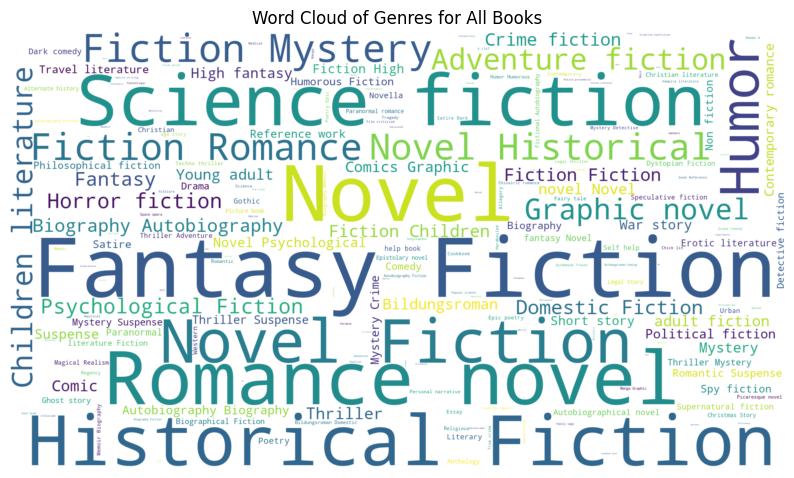

In [32]:
# Concatenates the genres of all books into a single string
all_genres_text = ' '.join(books02['genres'])

# Creates a word cloud based on all genres
wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(all_genres_text)

# Plot for the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Genres for All Books")
plt.show()